In [165]:
#!pip install --quiet yfinance
import pandas as pd
import yfinance as yf
import san
from datetime import  datetime

In [166]:
timeframe = '5y'

In [167]:
stocks = ('^GSPC', '^IXIC', '000001.SS', '^N100', '^NDX')
def load_data(ticker):
    data = yf.download(ticker, period=timeframe)
    data.reset_index(inplace=True)
    return data

df_stocks = load_data(stocks)
df_stocks.set_index('Date', inplace=True)
df_stocks = df_stocks['Open']

df_stocks = df_stocks.reset_index(level=0)
df_stocks = df_stocks.rename(columns={'Date': 'datetime'})

[*********************100%***********************]  5 of 5 completed


In [168]:
df_stocks

,datetime,000001.SS,^GSPC,^IXIC,^N100,^NDX
0,2017-07-17,NaN,2459.500000,6320.350098,NaN,5845.819824
1,2017-07-18,3159.731934,2455.879883,6304.819824,1007.530029,5832.919922
2,2017-07-19,3181.402100,2463.850098,6363.240234,1004.760010,5898.399902
3,2017-07-20,3227.506104,2475.560059,6396.459961,1012.309998,5929.580078
4,2017-07-21,3236.587891,2467.399902,6383.049805,1005.869995,5905.600098
...,...,...,...,...,...,...
1297,2022-07-12,3307.219971,3851.949951,11420.889648,1162.000000,11926.839844
1298,2022-07-13,3279.600098,3779.669922,11056.549805,1169.270020,11523.910156
1299,2022-07-14,3277.449951,3763.989990,11151.209961,1163.349976,11637.179688
1300,2022-07-15,3261.379883,3818.000000,11379.360352,1150.400024,11896.150391


In [169]:
metrics = ['price_usd', 
           'volume_usd',
           'twitter_followers',
           'daily_opening_price_usd', 
           'daily_high_price_usd', 
           'daily_low_price_usd', 
           'daily_closing_price_usd', 
           'daily_avg_price_usd', 
           'daily_trading_volume_usd', 
           'marketcap_usd', 
           'mvrv_usd', 
           'nvt', 
           'circulation_1d', 
           'dormant_circulation_90d', 
           'exchange_balance', 
           'daily_active_addresses', 
           'network_growth',
           'transaction_volume', 
           'transaction_volume_usd', 
           'fees_usd',
           'velocity', 
           'dev_activity', 
           'dev_activity_contributors_count', 
           'sentiment_positive_total', 
           'sentiment_negative_total', 
           'sentiment_balance_total', 
           'social_dominance_total', 
           'social_volume_total', 
           'unique_social_volume_total_5m', 
           'whale_transaction_count_100k_usd_to_inf', 
           'whale_transaction_count_1m_usd_to_inf'
           ]
len(metrics)

31

In [170]:
import pandas as pd

san.ApiConfig.api_key = ''
year = 5
days = 365
future_metrics = ['whale_transaction_count_100k_usd_to_inf_change_1d',
                  'whale_transaction_count_1m_usd_to_inf_change_30d']

old_metrics = ['price_usd', 'volume_usd', 
                'daily_active_addresses', 'network_growth', 
                'transaction_volume_usd', 'transaction_volume',
                'velocity', 'dev_activity', 'social_dominance_total',
                'social_volume_total', 'twitter_followers',
                'sentiment_positive_total', 'sentiment_negative_total',
                ]

metrics = ['price_usd', 
           'volume_usd',
           'twitter_followers',
           'daily_opening_price_usd', 
           'daily_high_price_usd', 
           'daily_low_price_usd', 
           'daily_closing_price_usd', 
           'daily_avg_price_usd', 
           'daily_trading_volume_usd', 
           'marketcap_usd', 
           'mvrv_usd', 
           'nvt', 
           'circulation_1d', 
           'dormant_circulation_90d', 
           'exchange_balance', 
           'daily_active_addresses', 
           'network_growth',
           'transaction_volume', 
           'fees_usd',
           'velocity', 
           'dev_activity', 
           'dev_activity_contributors_count', 
           'sentiment_positive_total', 
           'sentiment_negative_total', 
           'sentiment_balance_total', 
           'social_dominance_total', 
           'social_volume_total', 
           'unique_social_volume_total_5m', 
           'whale_transaction_count_100k_usd_to_inf', 
           'whale_transaction_count_1m_usd_to_inf'
           ]

tketh = 'ethereum'
tkbtc = 'bitcoin'

df_eth = pd.DataFrame()
df_btc = pd.DataFrame()

for metric in metrics:
    df_eth[metric] = san.get(
        metric + '/' + tketh,
        from_date=f"utc_now - {year*days}d",
        to_date="utc_now",
        interval="1d"
    )


In [171]:
df_eth['twitter_followers'].iloc[0] = 0

In [172]:
df_eth['twitter_followers'] = df_eth['twitter_followers'].interpolate()


In [173]:
df_eth

,price_usd,volume_usd,twitter_followers,daily_opening_price_usd,daily_high_price_usd,daily_low_price_usd,daily_closing_price_usd,daily_avg_price_usd,daily_trading_volume_usd,marketcap_usd,...,dev_activity,dev_activity_contributors_count,sentiment_positive_total,sentiment_negative_total,sentiment_balance_total,social_dominance_total,social_volume_total,unique_social_volume_total_5m,whale_transaction_count_100k_usd_to_inf,whale_transaction_count_1m_usd_to_inf
datetime,,,,,,,,,,,,,,,,,,,,,
2017-07-19 00:00:00+00:00,199.703000,2.328790e+09,0.000000e+00,234.941000,245.651000,191.745000,199.703000,225.754365,2.328790e+09,1.865361e+10,...,203.0,13.0,298.932560,418.395346,-119.462787,20.160264,3046.0,582.0,9195.0,68.0
2017-07-20 00:00:00+00:00,227.265000,2.225000e+09,1.599470e+03,205.422000,233.904000,203.216000,227.265000,219.248451,2.225000e+09,2.123365e+10,...,76.0,16.0,502.318793,560.209673,-57.890880,18.136377,4510.0,738.0,11223.0,92.0
2017-07-21 00:00:00+00:00,218.305000,1.006130e+09,3.198940e+03,226.061000,235.118000,213.010000,218.305000,224.663132,1.006130e+09,2.040171e+10,...,306.0,16.0,327.634699,324.906935,2.727765,14.969817,2964.0,418.0,12146.0,33.0
2017-07-22 00:00:00+00:00,229.476000,6.182600e+08,4.798410e+03,217.860000,232.696000,216.868000,229.476000,224.024802,6.182600e+08,2.145127e+10,...,19.0,10.0,262.715333,193.865971,68.849362,12.234222,2024.0,421.0,3380.0,17.0
2017-07-23 00:00:00+00:00,225.951000,6.496150e+08,6.397880e+03,229.123000,231.680000,217.722000,225.951000,226.163958,6.496150e+08,2.112730e+10,...,20.0,9.0,239.986047,143.390365,96.595682,11.016531,1866.0,365.0,3506.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-14 00:00:00+00:00,1191.526214,1.668864e+10,2.678636e+06,1114.181497,1202.887039,1077.405716,1191.526214,1126.684306,1.668864e+10,1.448281e+11,...,463.0,64.0,3910.499872,2140.500134,1769.999738,9.474966,6454.0,2759.0,3748.0,606.0
2022-07-15 00:00:00+00:00,1233.313124,1.741254e+10,2.681636e+06,1191.518802,1275.591166,1182.903210,1233.313124,1219.854000,1.741254e+10,1.499240e+11,...,438.0,57.0,3545.173518,2262.826489,1282.347029,11.010928,6288.0,3234.0,4625.0,946.0
2022-07-16 00:00:00+00:00,1352.626475,1.836401e+10,2.682840e+06,1230.852545,1366.875516,1195.794563,1352.626475,1259.845731,1.836401e+10,1.644462e+11,...,164.0,29.0,3537.616546,2290.383462,1247.233084,11.906644,6159.0,3047.0,3914.0,535.0


In [174]:

df_btc['price_usd'] = san.get(
        'price_usd' + '/' + tkbtc,
        from_date=f"utc_now - {year*days}d",
        to_date="utc_now",
        interval="1d"
    )

df_btc = df_btc.rename(columns={'price_usd': 'btc_price_usd'})

In [175]:
df_crypto = pd.merge(df_eth, df_btc, how='outer', on='datetime')

In [176]:
df_crypto.index = pd.to_datetime(df_crypto.index)

In [177]:
df_crypto = df_crypto.reset_index(level=0)

In [178]:
df_crypto['datetime'] = df_crypto['datetime'].apply(lambda x: x.replace(tzinfo=None))

In [179]:
df_crypto

,datetime,price_usd,volume_usd,twitter_followers,daily_opening_price_usd,daily_high_price_usd,daily_low_price_usd,daily_closing_price_usd,daily_avg_price_usd,daily_trading_volume_usd,...,dev_activity_contributors_count,sentiment_positive_total,sentiment_negative_total,sentiment_balance_total,social_dominance_total,social_volume_total,unique_social_volume_total_5m,whale_transaction_count_100k_usd_to_inf,whale_transaction_count_1m_usd_to_inf,btc_price_usd
0,2017-07-19,199.703000,2.328790e+09,0.000000e+00,234.941000,245.651000,191.745000,199.703000,225.754365,2.328790e+09,...,13.0,298.932560,418.395346,-119.462787,20.160264,3046.0,582.0,9195.0,68.0,2273.430000
1,2017-07-20,227.265000,2.225000e+09,1.599470e+03,205.422000,233.904000,203.216000,227.265000,219.248451,2.225000e+09,...,16.0,502.318793,560.209673,-57.890880,18.136377,4510.0,738.0,11223.0,92.0,2817.600000
2,2017-07-21,218.305000,1.006130e+09,3.198940e+03,226.061000,235.118000,213.010000,218.305000,224.663132,1.006130e+09,...,16.0,327.634699,324.906935,2.727765,14.969817,2964.0,418.0,12146.0,33.0,2667.760000
3,2017-07-22,229.476000,6.182600e+08,4.798410e+03,217.860000,232.696000,216.868000,229.476000,224.024802,6.182600e+08,...,10.0,262.715333,193.865971,68.849362,12.234222,2024.0,421.0,3380.0,17.0,2810.120000
4,2017-07-23,225.951000,6.496150e+08,6.397880e+03,229.123000,231.680000,217.722000,225.951000,226.163958,6.496150e+08,...,9.0,239.986047,143.390365,96.595682,11.016531,1866.0,365.0,3506.0,30.0,2730.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2022-07-14,1191.526214,1.668864e+10,2.678636e+06,1114.181497,1202.887039,1077.405716,1191.526214,1126.684306,1.668864e+10,...,64.0,3910.499872,2140.500134,1769.999738,9.474966,6454.0,2759.0,3748.0,606.0,20569.920062
1822,2022-07-15,1233.313124,1.741254e+10,2.681636e+06,1191.518802,1275.591166,1182.903210,1233.313124,1219.854000,1.741254e+10,...,57.0,3545.173518,2262.826489,1282.347029,11.010928,6288.0,3234.0,4625.0,946.0,20836.328645
1823,2022-07-16,1352.626475,1.836401e+10,2.682840e+06,1230.852545,1366.875516,1195.794563,1352.626475,1259.845731,1.836401e+10,...,29.0,3537.616546,2290.383462,1247.233084,11.906644,6159.0,3047.0,3914.0,535.0,21190.315668
1824,2022-07-17,1338.635703,1.607971e+10,2.685924e+06,1353.850277,1377.401026,1329.802036,1338.635703,1352.266164,1.607971e+10,...,19.0,2803.872135,1903.127867,900.744268,11.191378,5062.0,2589.0,3185.0,489.0,20779.344540


In [180]:
# DEFILLAMA

import requests

url_total_TVL = 'https://api.llama.fi/charts'
url_eth_TVL = 'https://api.llama.fi/charts/Ethereum'

r_total_TVL = requests.get(url_total_TVL)
r_eth_TVL = requests.get(url_eth_TVL)

json_total_TVL = r_total_TVL.json()
json_eth_TVL = r_eth_TVL.json()
df_total_TVL = pd.DataFrame(json_total_TVL)
df_eth_TVL = pd.DataFrame(json_eth_TVL)

In [181]:
df_total_TVL = df_total_TVL.rename(columns={'totalLiquidityUSD': 'total_TVL', 'date': 'datetime'})
df_eth_TVL = df_eth_TVL.rename(columns={'totalLiquidityUSD': 'eth_TVL', 'date': 'datetime'})

In [182]:
df_tvl = pd.merge(df_total_TVL, df_eth_TVL, how='outer', on='datetime')

In [183]:
df_tvl['datetime'] = df_tvl['datetime'].apply(lambda x:datetime.utcfromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S'))

In [184]:
df_tvl['datetime'] = pd.to_datetime(df_tvl['datetime'])

In [185]:
df_tvl

,datetime,total_TVL,eth_TVL
0,2018-11-03,3.468404e+04,3.468404e+04
1,2018-11-04,4.129299e+04,4.129299e+04
2,2018-11-05,4.155031e+04,4.155031e+04
3,2018-11-06,4.323356e+04,4.323356e+04
4,2018-11-07,1.538626e+05,1.538626e+05
...,...,...,...
1349,2022-07-14,7.418531e+10,4.618344e+10
1350,2022-07-15,7.603168e+10,4.767520e+10
1351,2022-07-16,7.684000e+10,4.835536e+10
1352,2022-07-17,8.023251e+10,5.101665e+10


In [186]:
# CRYPTOSLAM
eth_NFT_sales = pd.read_csv(os.path.join('..','raw_data', 'ETH NFT Sales.csv'))
total_NFT_sales = pd.read_csv(os.path.join('..','raw_data', 'Total NFT Sales.csv'))

In [187]:
eth_NFT_sales = eth_NFT_sales.rename(columns={'Sales (USD) (y)': 'eth_NFT_sales', 'Unique Buyers (y)': 'eth_NFT_buyers', 'DateTime': 'datetime'})
total_NFT_sales = total_NFT_sales.rename(columns={'Sales (USD) (y)': 'total_NFT_sales', 'Unique Buyers (y)': 'total_NFT_buyers', 'DateTime': 'datetime'})

In [188]:
df_NFT = pd.merge(eth_NFT_sales, total_NFT_sales, how='outer', on='datetime')


In [189]:
df_NFT['datetime'] = pd.to_datetime(df_NFT['datetime'])

In [190]:
df_NFT

,datetime,eth_NFT_sales,eth_NFT_buyers,total_NFT_sales,total_NFT_buyers
0,2017-06-23,1455.93,9,1455.93,9
1,2017-06-24,845.73,7,845.73,7
2,2017-06-25,593.68,7,593.68,7
3,2017-06-26,1076.49,10,1076.49,10
4,2017-06-27,2090.85,8,2090.85,8
...,...,...,...,...,...
1798,2022-07-10,16750596.42,13205,19310139.95,40092
1799,2022-07-11,14574042.54,14355,17449920.08,43668
1800,2022-07-12,15642122.61,15676,18884615.57,45364
1801,2022-07-13,16519466.28,13972,20053088.85,43598


In [191]:
#Etherscan
daily_transactions = pd.read_csv(os.path.join('..','raw_data', 'Daily Transactions_7.18.22.csv'))
daily_transactions = daily_transactions.rename(columns={'Date(UTC)': 'datetime', 'UnixTimeStamp': 'timestamp', 'Value': 'daily transactions'})
daily_transactions.drop(columns='timestamp', inplace=True)
daily_transactions['datetime']=daily_transactions['datetime'].astype('datetime64')

In [192]:
daily_transactions

,datetime,daily transactions
0,2015-07-30,8893
1,2015-07-31,0
2,2015-08-01,0
3,2015-08-02,0
4,2015-08-03,0
...,...,...
2540,2022-07-13,1174882
2541,2022-07-14,1189567
2542,2022-07-15,1217596
2543,2022-07-16,1241502


In [193]:
data = pd.DataFrame()
#MTG:  changed from outer to left
data = pd.merge(df_crypto, df_NFT, how='left', on='datetime')
data = pd.merge(data, df_tvl, how='left', on='datetime')
data = pd.merge(data, df_stocks, how='left', on='datetime')
data = pd.merge(data, daily_transactions, how='left', on='datetime')

#MTG:  interpolated eth and NFt sales
features_toplot = (['000001.SS', '^GSPC', '^IXIC', '^N100', '^NDX', 'twitter_followers','eth_NFT_sales', 'eth_NFT_buyers','total_NFT_sales', 'total_NFT_buyers'])
for feature in features_toplot:
    data[feature] = data[feature].interpolate()

In [194]:
data.shape[0]/365

5.002739726027397

In [195]:
# MTG:  converted all USD amounts to ETH
data["volume_ETH"] = data["volume_usd"]/data["price_usd"]
data["daily_trading_volume_ETH"] = data["daily_trading_volume_usd"]/data["price_usd"]
data["eth_NFT_sales_ETH"] = data["eth_NFT_sales"]/data["price_usd"]
data["total_NFT_sales_ETH"] = data["total_NFT_sales"]/data["price_usd"]
data["total_TVL_ETH"] = data["total_TVL"]/data["price_usd"]
data["eth_TVL_ETH"] = data["eth_TVL"]/data["price_usd"]
data["fees_usd_ETH"] = data["fees_usd"]/data["price_usd"]
data["mvrv_usd_ETH"] = data["mvrv_usd"]/data["price_usd"]

In [196]:
'fees_usd' in data.columns

True

In [197]:
data.head()

,datetime,price_usd,volume_usd,twitter_followers,daily_opening_price_usd,daily_high_price_usd,daily_low_price_usd,daily_closing_price_usd,daily_avg_price_usd,daily_trading_volume_usd,...,^NDX,daily transactions,volume_ETH,daily_trading_volume_ETH,eth_NFT_sales_ETH,total_NFT_sales_ETH,total_TVL_ETH,eth_TVL_ETH,fees_usd_ETH,mvrv_usd_ETH
0,2017-07-19,199.703,2.328790e+09,0.000000,234.941,245.651,191.745,199.703,225.754365,2.328790e+09,...,5898.399902,270122.0,1.166127e+07,1.166127e+07,14.064936,14.064936,NaN,NaN,365.350194,0.011437
1,2017-07-20,227.265,2.225000e+09,1599.470085,205.422,233.904,203.216,227.265,219.248451,2.225000e+09,...,5929.580078,250065.0,9.790333e+06,9.790333e+06,7.576750,7.576750,NaN,NaN,247.447680,0.011367
2,2017-07-21,218.305,1.006130e+09,3198.940171,226.061,235.118,213.010,218.305,224.663132,1.006130e+09,...,5905.600098,232560.0,4.608827e+06,4.608827e+06,11.557729,11.557729,NaN,NaN,318.181498,0.011340
3,2017-07-22,229.476,6.182600e+08,4798.410256,217.860,232.696,216.868,229.476,224.024802,6.182600e+08,...,5910.710124,205574.0,2.694225e+06,2.694225e+06,3.368588,3.368588,NaN,NaN,219.567224,0.011269
4,2017-07-23,225.951,6.496150e+08,6397.880342,229.123,231.680,217.722,225.951,226.163958,6.496150e+08,...,5915.820150,260490.0,2.875026e+06,2.875026e+06,3.263761,3.263761,NaN,NaN,288.884582,0.011243


In [199]:
data_bck = data

In [201]:
data = data.drop(columns=['fees_usd', 'mvrv_usd', 'volume_usd', 'daily_trading_volume_usd','eth_NFT_sales','total_NFT_sales','total_TVL','eth_TVL'])

In [204]:
data

,datetime,price_usd,twitter_followers,daily_opening_price_usd,daily_high_price_usd,daily_low_price_usd,daily_closing_price_usd,daily_avg_price_usd,marketcap_usd,nvt,...,^NDX,daily transactions,volume_ETH,daily_trading_volume_ETH,eth_NFT_sales_ETH,total_NFT_sales_ETH,total_TVL_ETH,eth_TVL_ETH,fees_usd_ETH,mvrv_usd_ETH
0,2017-07-19,199.703000,0.000000e+00,234.941000,245.651000,191.745000,199.703000,225.754365,1.865361e+10,47.219051,...,5898.399902,270122.0,1.166127e+07,1.166127e+07,14.064936,14.064936,NaN,NaN,365.350194,0.011437
1,2017-07-20,227.265000,1.599470e+03,205.422000,233.904000,203.216000,227.265000,219.248451,2.123365e+10,86.510306,...,5929.580078,250065.0,9.790333e+06,9.790333e+06,7.576750,7.576750,NaN,NaN,247.447680,0.011367
2,2017-07-21,218.305000,3.198940e+03,226.061000,235.118000,213.010000,218.305000,224.663132,2.040171e+10,142.734983,...,5905.600098,232560.0,4.608827e+06,4.608827e+06,11.557729,11.557729,NaN,NaN,318.181498,0.011340
3,2017-07-22,229.476000,4.798410e+03,217.860000,232.696000,216.868000,229.476000,224.024802,2.145127e+10,132.134115,...,5910.710124,205574.0,2.694225e+06,2.694225e+06,3.368588,3.368588,NaN,NaN,219.567224,0.011269
4,2017-07-23,225.951000,6.397880e+03,229.123000,231.680000,217.722000,225.951000,226.163958,2.112730e+10,120.492452,...,5915.820150,260490.0,2.875026e+06,2.875026e+06,3.263761,3.263761,NaN,NaN,288.884582,0.011243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2022-07-14,1191.526214,2.678636e+06,1114.181497,1202.887039,1077.405716,1191.526214,1126.684306,1.448281e+11,140.592232,...,11637.179688,1189567.0,1.400610e+07,1.400610e+07,13557.816999,16388.157381,6.226075e+07,3.875990e+07,3638.728857,0.000647
1822,2022-07-15,1233.313124,2.681636e+06,1191.518802,1275.591166,1182.903210,1233.313124,1219.854000,1.499240e+11,82.122676,...,11896.150391,1217596.0,1.411851e+07,1.411851e+07,13098.453301,15832.896561,6.164832e+07,3.865620e+07,3413.898523,0.000647
1823,2022-07-16,1352.626475,2.682840e+06,1230.852545,1366.875516,1195.794563,1352.626475,1259.845731,1.644462e+11,215.157463,...,11896.150391,1241502.0,1.357656e+07,1.357656e+07,11943.056457,14436.298178,5.680800e+07,3.574923e+07,2541.533774,0.000647
1824,2022-07-17,1338.635703,2.685924e+06,1353.850277,1377.401026,1329.802036,1338.635703,1352.266164,1.627631e+11,206.975343,...,11896.150391,1245545.0,1.201201e+07,1.201201e+07,12067.879502,14587.179378,5.993603e+07,3.811093e+07,2516.489876,0.000647


In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 0 to 1825
Data columns (total 44 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   datetime                                 1826 non-null   datetime64[ns]
 1   price_usd                                1826 non-null   float64       
 2   twitter_followers                        1826 non-null   float64       
 3   daily_opening_price_usd                  1825 non-null   float64       
 4   daily_high_price_usd                     1825 non-null   float64       
 5   daily_low_price_usd                      1825 non-null   float64       
 6   daily_closing_price_usd                  1825 non-null   float64       
 7   daily_avg_price_usd                      1825 non-null   float64       
 8   marketcap_usd                            1826 non-null   float64       
 9   nvt                                      

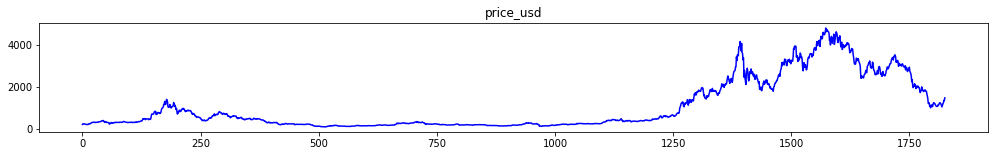

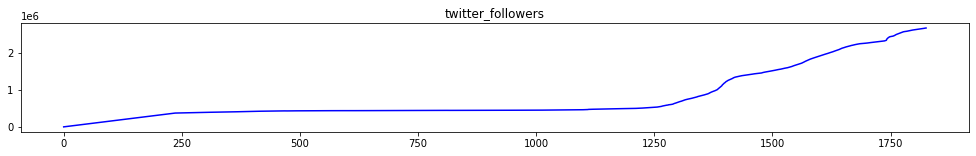

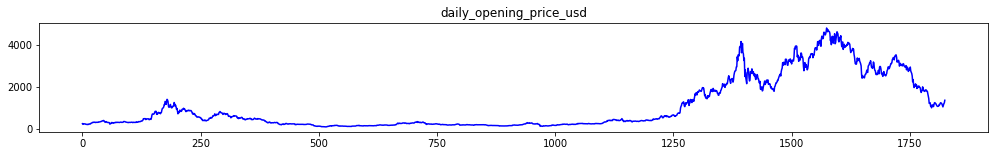

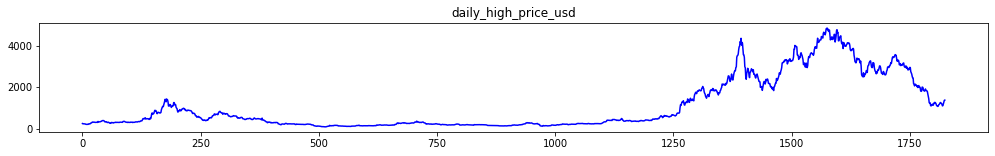

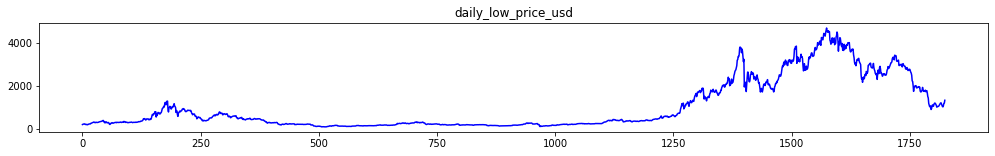

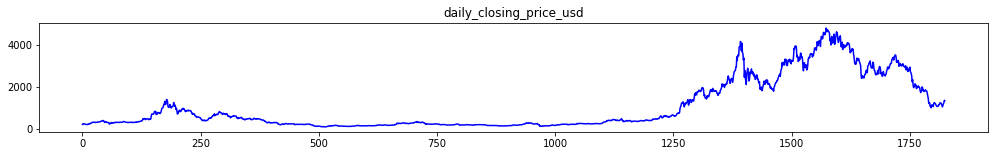

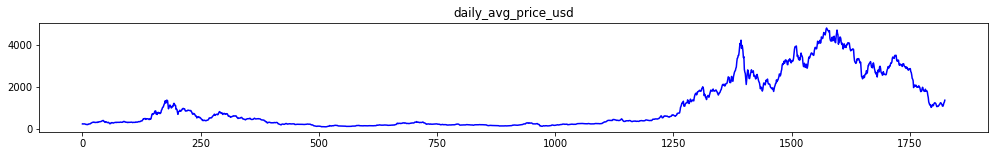

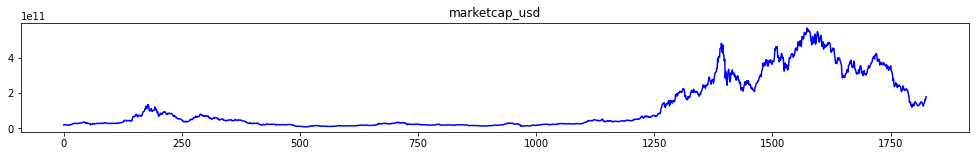

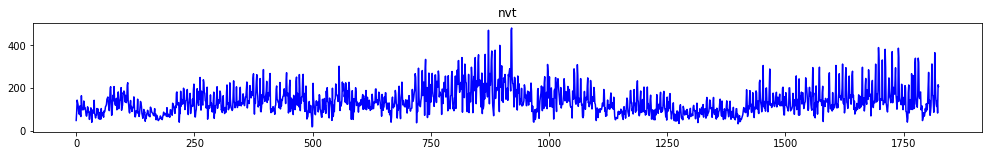

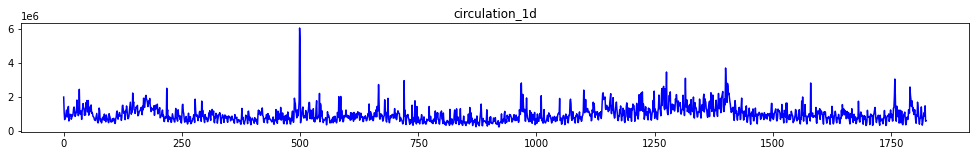

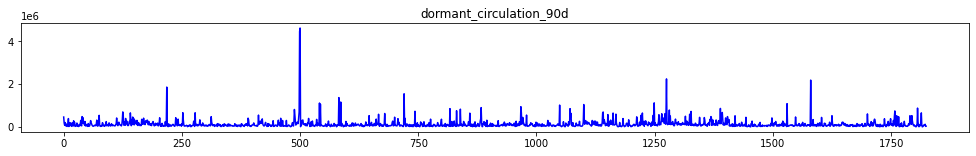

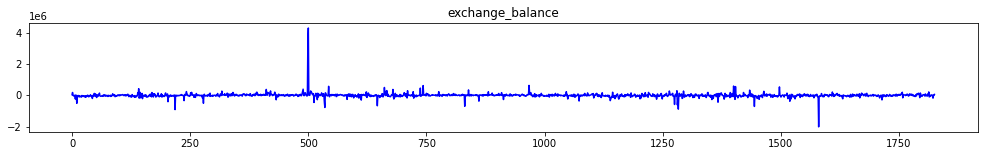

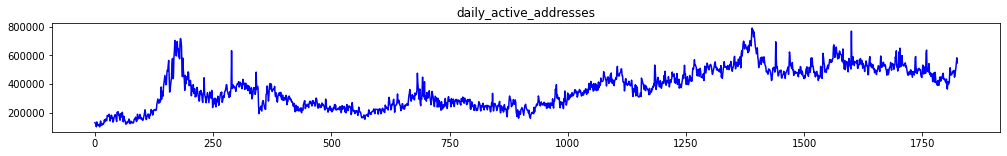

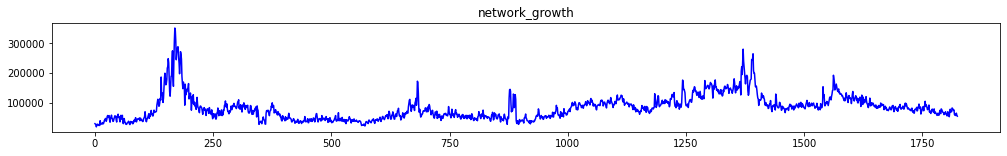

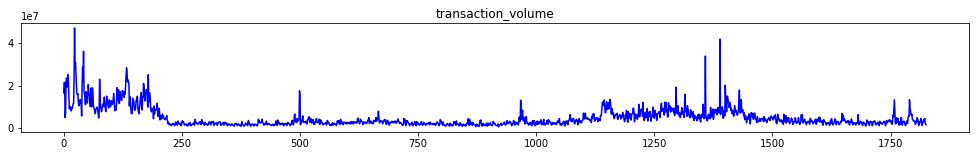

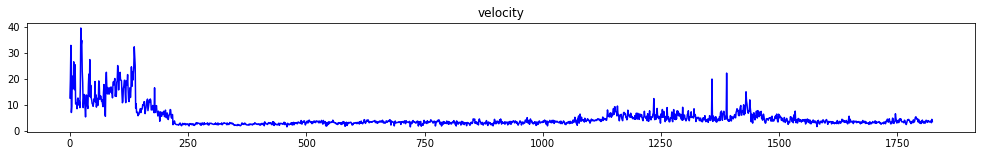

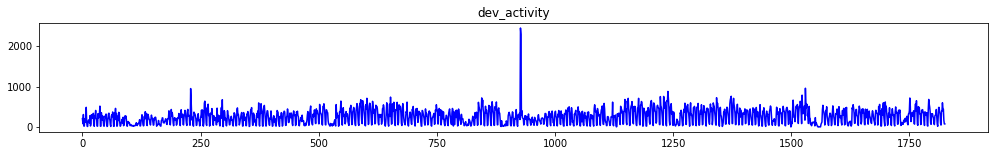

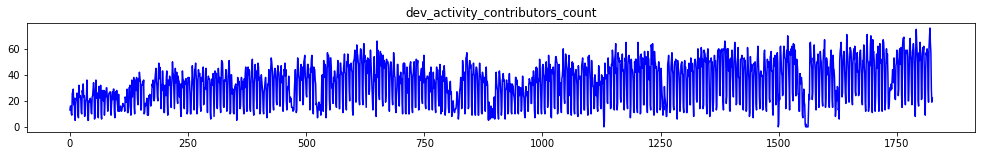

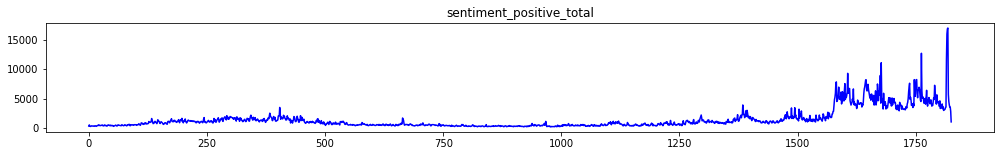

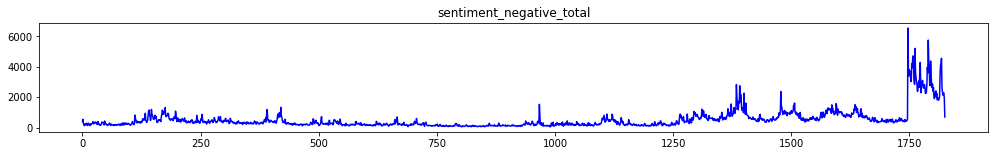

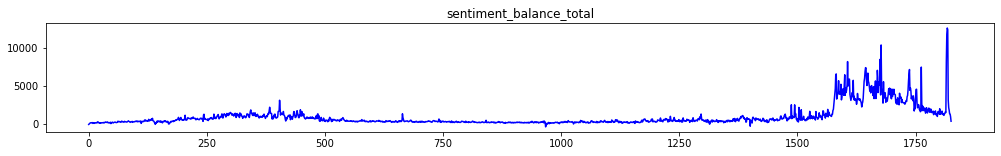

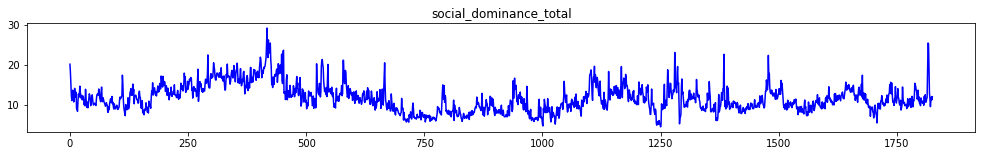

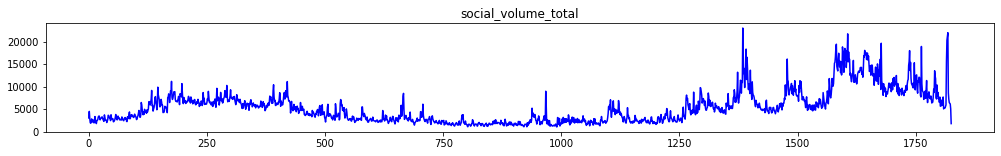

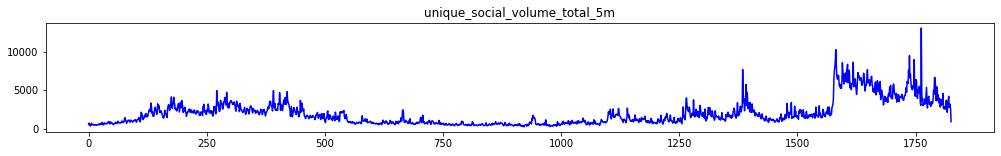

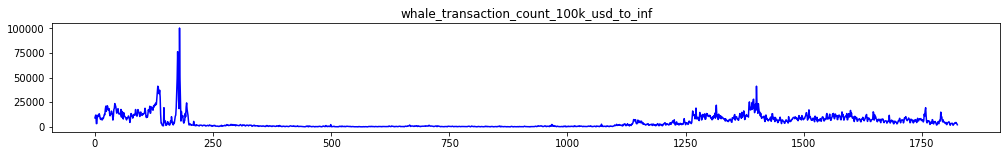

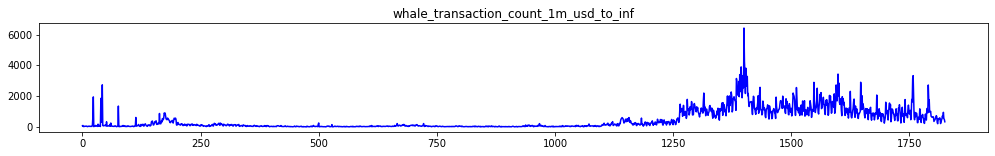

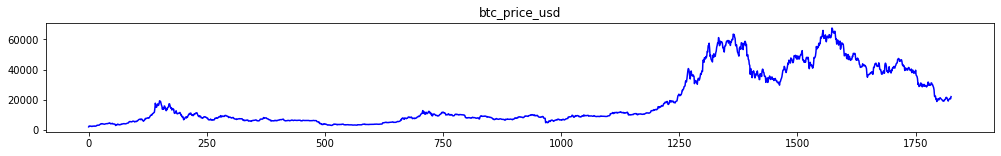

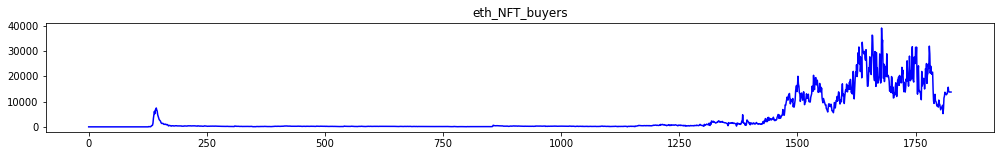

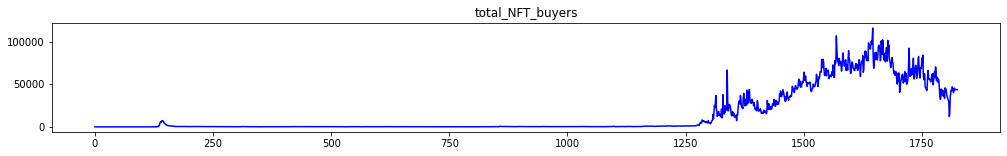

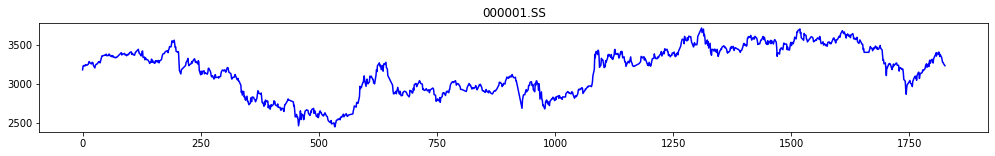

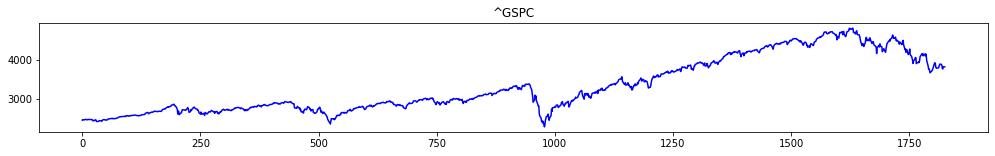

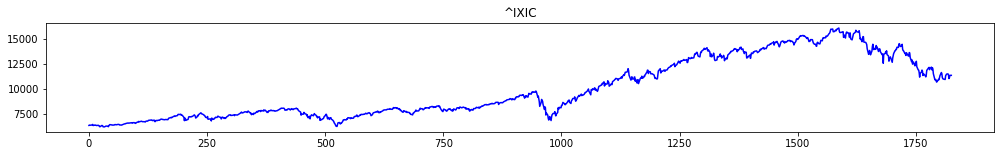

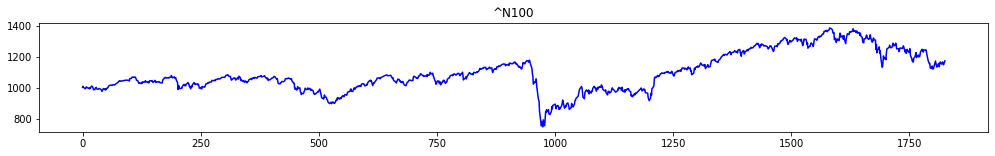

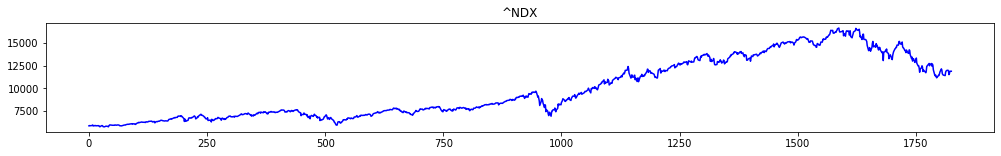

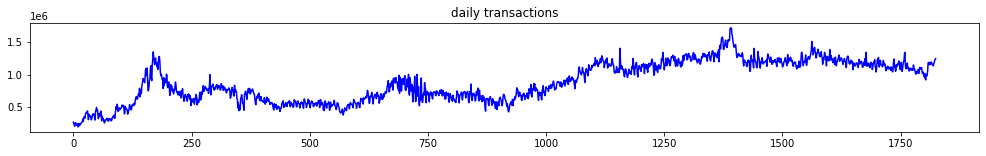

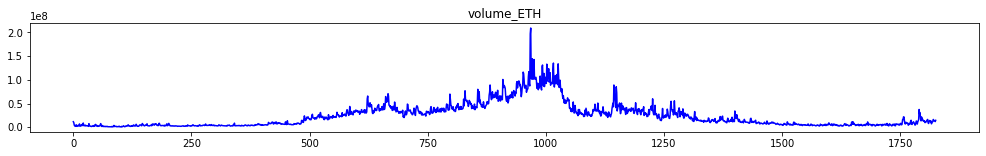

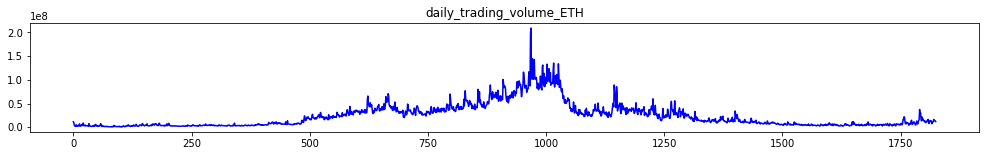

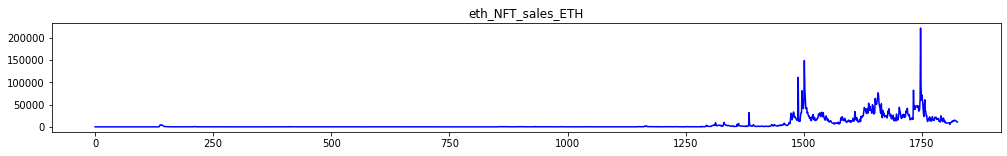

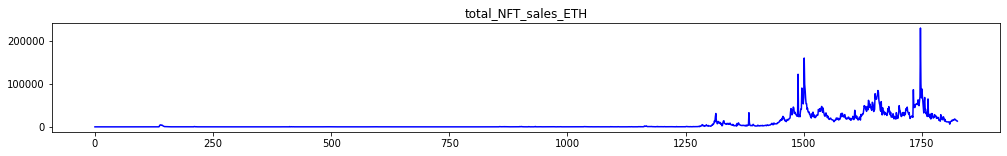

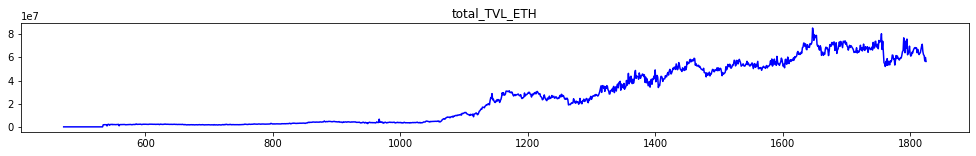

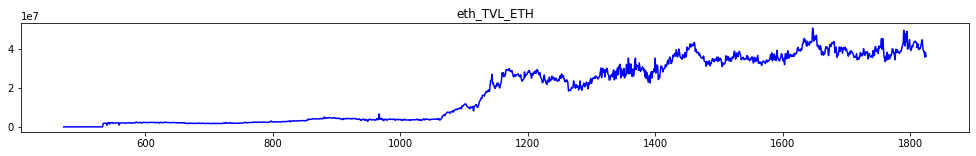

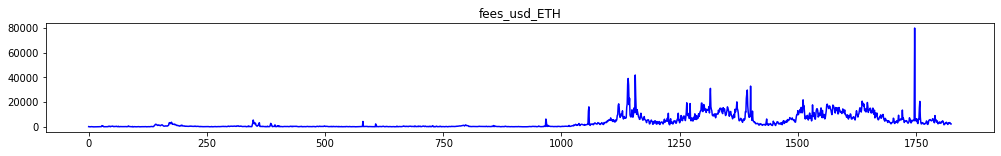

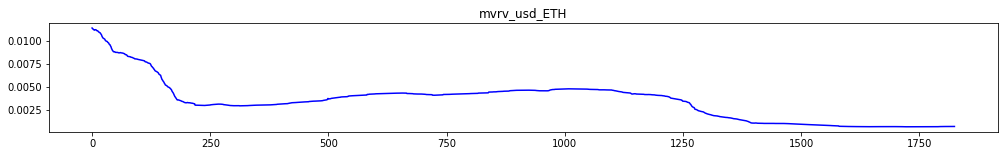

In [206]:
import matplotlib.pyplot as plt
%matplotlib inline

for col in data.drop(columns='datetime').columns:
    color="orange" if col == "Price" else "blue"
    data[col].plot(figsize=(17, 2), color=color)
    plt.title(col)
    plt.show()
    


In [208]:
import numpy as np
data.total_TVL_ETH.replace(np.nan, 0, inplace=True)
data.eth_TVL_ETH.replace(np.nan, 0, inplace=True)

In [209]:
data = data.iloc[2:]
data = data.iloc[:-1]

In [210]:
data.to_csv(os.path.join('..','raw_data', 'data_advanced_v2.csv'))

In [390]:
print(data.isnull().sum().sort_values(ascending=False))



price_usd                                  0
eth_NFT_sales                              0
sentiment_negative_total                   0
sentiment_balance_total                    0
social_dominance_total                     0
social_volume_total                        0
unique_social_volume_total_5m              0
whale_transaction_count_100k_usd_to_inf    0
whale_transaction_count_1m_usd_to_inf      0
btc_price_usd                              0
eth_NFT_buyers                             0
dev_activity_contributors_count            0
total_NFT_sales                            0
total_NFT_buyers                           0
total_TVL                                  0
eth_TVL                                    0
000001.SS                                  0
^GSPC                                      0
^IXIC                                      0
^N100                                      0
sentiment_positive_total                   0
dev_activity                               0
volume_usd

In [387]:
total_features_toplot = (['price_usd', 'volume_usd', 'twitter_followers',
       'daily_opening_price_usd', 'daily_high_price_usd',
       'daily_low_price_usd', 'daily_closing_price_usd', 'daily_avg_price_usd',
       'daily_trading_volume_usd', 'marketcap_usd', 'mvrv_usd', 'nvt',
       'circulation_1d', 'dormant_circulation_90d', 'exchange_balance',
       'daily_active_addresses', 'network_growth', 'transaction_volume',
       'transaction_volume_usd', 'fees_usd', 'velocity', 'dev_activity',
       'dev_activity_contributors_count', 'community_messages_count_total',
       'sentiment_positive_total', 'sentiment_negative_total',
       'sentiment_balance_total', 'social_dominance_total',
       'social_volume_total', 'unique_social_volume_total_5m',
       'whale_transaction_count_100k_usd_to_inf',
       'whale_transaction_count_1m_usd_to_inf', 'btc_price_usd',
       'eth_NFT_sales', 'eth_NFT_buyers', 'total_NFT_sales',
       'total_NFT_buyers', 'total_TVL', 'eth_TVL', '000001.SS', '^GSPC',
       '^IXIC', '^N100', '^NDX'])



In [169]:
total_features = ('price_usd', 'volume_usd', 'twitter_followers',
       'daily_opening_price_usd', 'daily_high_price_usd',
       'daily_low_price_usd', 'daily_closing_price_usd', 'daily_avg_price_usd',
       'daily_trading_volume_usd', 'marketcap_usd', 'mvrv_usd', 'nvt',
       'circulation_1d', 'dormant_circulation_90d', 'exchange_balance',
       'daily_active_addresses', 'network_growth', 'transaction_volume',
       'transaction_volume_usd', 'fees_usd', 'velocity', 'dev_activity',
       'dev_activity_contributors_count', 'community_messages_count_total',
       'sentiment_positive_total', 'sentiment_negative_total',
       'sentiment_balance_total', 'social_dominance_total',
       'social_volume_total', 'unique_social_volume_total_5m',
       'whale_transaction_count_100k_usd_to_inf',
       'whale_transaction_count_1m_usd_to_inf', 'btc_price_usd',
       'eth_NFT_sales', 'eth_NFT_buyers', 'total_NFT_sales',
       'total_NFT_buyers', 'total_TVL', 'eth_TVL', '000001.SS', '^GSPC',
       '^IXIC', '^N100', '^NDX')

